In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import anndata as ad
import datetime
from scipy.sparse import csr_matrix
from sklearn.cluster import KMeans
from scipy.sparse.linalg import eigsh

In [2]:
import sys
sys.path.append('/home/users/kzlin/kzlinlab/projects/veloUncertainty/git/veloUncertainty/veloUncertainty')
from countsplit import *

sct_seed = 615

def print_message_with_time(message):
    current_time = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    print(f"{message} at {current_time}")

adata = sc.read_h5ad("/home/users/kzlin/kzlinlab/projects/veloUncertainty/out/yuhong/data/Gastrulation/erythroid_lineage.h5ad")


In [3]:
adata

AnnData object with n_obs × n_vars = 9815 × 53801
    obs: 'sample', 'stage', 'sequencing.batch', 'theiler', 'celltype'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'MURK_gene', 'Δm', 'scaled Δm'
    uns: 'celltype_colors'
    obsm: 'X_pca', 'X_umap'
    layers: 'spliced', 'unspliced'

In [3]:
random.seed(sct_seed)
np.random.seed(sct_seed)

In [4]:
adata.X = adata.X.astype(np.float32)
sc.pp.calculate_qc_metrics(adata, 
                           percent_top=None, 
                           log1p=False, 
                           inplace=True)
sc.pp.highly_variable_genes(adata, 
                            flavor='seurat_v3', 
                            n_top_genes=2000, 
                            subset=True)

In [5]:
# Step 1: Log-transform the data
sc.pp.log1p(adata)  # This will log-transform adata.X in place

# Step 2: Compute the correlation matrix among all 2000 genes
# Convert to dense if adata.X is still in sparse format
data_dense = adata.X.toarray() 

# Check for NaN or infinite values and replace them with zeros or appropriate values
data_dense = np.nan_to_num(data_dense)

# Step 3: Compute the correlation matrix among all 2000 genes
correlation_matrix = np.corrcoef(data_dense.T)

# Step 4: Compute the eigendecomposition
# Compute the top 30 eigenvalues and corresponding eigenvectors
# Note: If there are fewer than 30 dimensions, adjust accordingly
k = min(30, correlation_matrix.shape[0])
eigenvalues, eigenvectors = eigsh(correlation_matrix, k=k, which='LM')


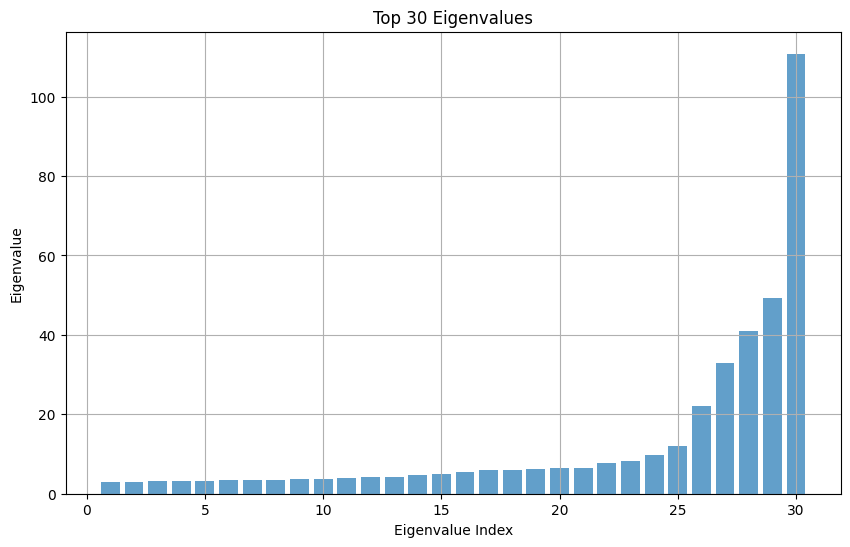

In [6]:
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(eigenvalues) + 1), eigenvalues, alpha=0.7, align='center')
plt.xlabel('Eigenvalue Index')
plt.ylabel('Eigenvalue')
plt.title('Top 30 Eigenvalues')
plt.grid(True)
plt.show()